# MTSU Computational Science
## Research Experience for Undergraduates

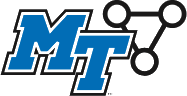

### Python Bootcamp - Module 3-B
#### Intro to Symbolic and Numerical ODE Methods

Numerical solutions for the material for this module adapted from: http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

In [1]:
# Import the required modules
import numpy as np

import sympy as sp
sp.init_printing(use_latex=True)

from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

First-order ODE:

$ \frac{dy}{dx} + y = x $

$ y(0) = 1 $

We will solve this *first* symbolically using Sympy and then *second* we will solve it numerically using Scipy (odeint).

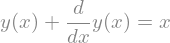

In [2]:
x = sp.symbols('x')
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x)+y(x),x)
eq

In [3]:
temp = sp.dsolve(eq)
temp

In [4]:
# Apply initial condition(s)
temp.subs(x,0).subs(y(0),1)

In [5]:
# Solve for the constant
c1 = sp.solve(temp.subs(x,0).subs(y(0),1),'C1')[0]
c1

In [6]:
solution = sp.simplify(temp.subs('C1',c1))
solution

In [7]:
# Alternatively... supply the IBCs to dsolve...
solution = sp.simplify(sp.dsolve(eq,ics={y(0):1}))
solution

In [8]:
# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

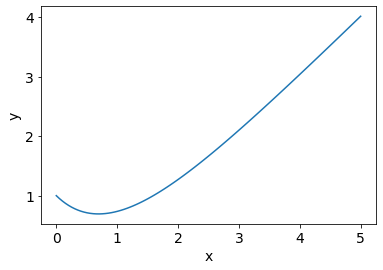

In [9]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys)
plt.show()

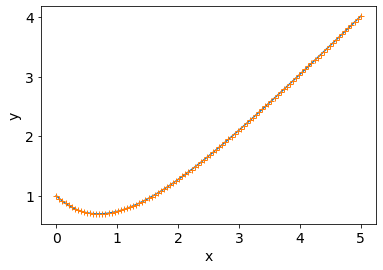

In [10]:
# Plot the exact and numerical solution together
y_exact = np.array([solution.rhs.evalf(subs={x:i}) for i in xs])
y_difference = ys - y_exact
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys, xs, y_exact, "+")
plt.show()

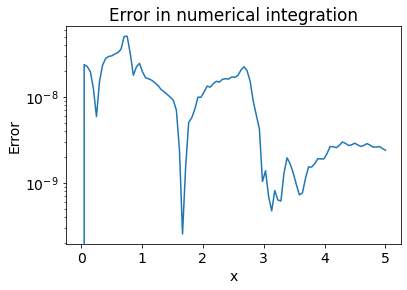

In [11]:
y_diff = np.abs(y_exact - ys)
# Note the logarithmic scale on the y-axis. 
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration")
plt.show()

Second-order ODE:

$ y'' + 2y' + 2y = \cos(2x) $

$ y(0) = 0 $

$ y'(0) = 0 $

Converted to two first-order ODEs (via new dependent variable):

$ z \equiv y' $

$ z' + 2z + 2y = \cos(2x) $

$ z(0) = y(0) = 0 $

But... we have Sympy!

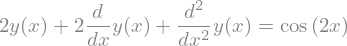

In [12]:
eq = sp.Eq(y(x).diff(x).diff(x) + 2*y(x).diff(x) + 2*y(x), sp.cos(2*x))
eq

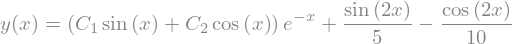

In [13]:
temp = sp.dsolve(eq)
temp

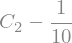

In [14]:
temp.rhs.subs(x,0)

In [15]:
# Determine C2 ... must be 1/10
temp.subs('C2',1/10).subs(x,0)

In [16]:
temp.rhs.diff(x).subs(x,0).subs('C2',1/10)

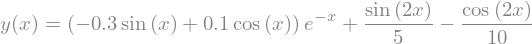

In [17]:
temp.subs('C2',1/10).subs('C1',-3/10)

In [18]:
# Determine C1 ... to machine precision must be -3/10
temp.rhs.diff(x).subs('C2',1/10).subs('C1',-3/10).subs(x,0)

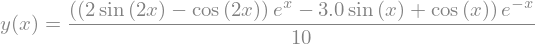

In [19]:
solution = sp.simplify(temp.subs('C2',1/10).subs('C1',-3/10))
solution

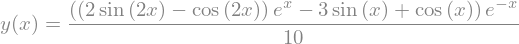

In [20]:
## Alternatively... supply the IBCs to dsolve...
solution = sp.simplify(sp.dsolve(eq,ics={y(x).diff(x).subs(x,0):0,y(0):0}))
solution

In [21]:
# Numerical solution...
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

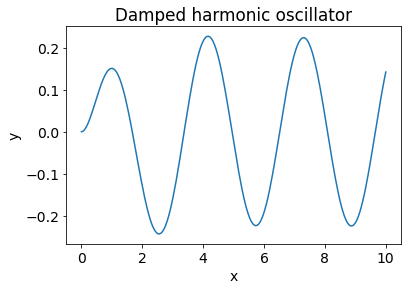

In [22]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys)
plt.show()

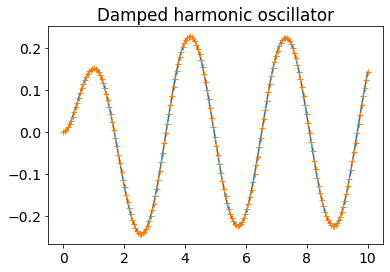

In [23]:
# Plot the exact and numerical solution together
y_exact = np.array([solution.rhs.evalf(subs={'C2':1/10,'C1':-3/10,x:i}) for i in xs])
y_difference = ys - y_exact
plt.title("Damped harmonic oscillator")
plt.plot(xs, ys, xs, y_exact, "+")
plt.show()

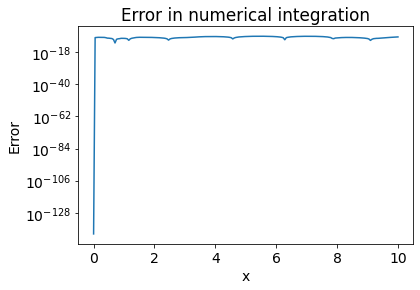

In [24]:
y_diff = np.abs(y_exact - ys)
# Note the logarithmic scale on the y-axis. 
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration")
plt.show()

### Predator-Prey Equations
http://en.wikipedia.org/wiki/Lotka-Volterra_equation
 * x = foxes = predators
 * y = rabbits = prey

Two first-order nonlinear ODEs:

$ \frac{dx}{dt} = x(a-by) $

$ \frac{dy}{dt} = -y(c-dx) $

where $a,b,c,d$ are all assumed to be positive...

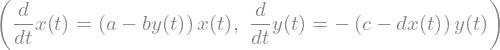

In [25]:
t,a,b,c,d = sp.symbols('t a b c d')
x, y = sp.symbols('x y',cls=sp.Function)
eq = (sp.Eq(x(t).diff(t),x(t)*(a-b*y(t))),
      sp.Eq(y(t).diff(t),-y(t)*(c-d*x(t))))
eq

In [26]:
## Sympy can't solve this... (not possible?)
temp = sp.dsolve(eq,ics={x(0):1.5,y(0):1.0})
temp

ValueError: Couldn't solve for initial conditions

In [27]:
# But we CAN solve it numerically!
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

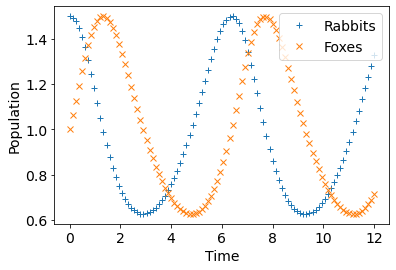

In [28]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

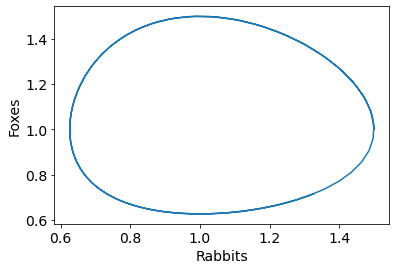

In [31]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.show()

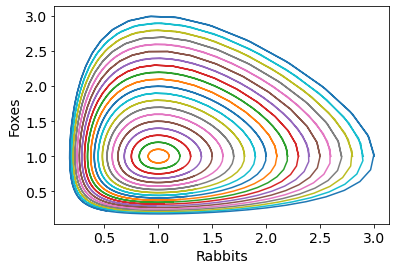

In [32]:
# Periodic system
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.show()

Copyright &copy; 2022 Joshua L. Phillips